In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv("breast_cancer_data.csv")

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [5]:
X = df[['mean_radius', 'mean_perimeter', 'mean_area']]
y = df['diagnosis']
X, y

(     mean_radius  mean_perimeter  mean_area
 0          17.99          122.80     1001.0
 1          20.57          132.90     1326.0
 2          19.69          130.00     1203.0
 3          11.42           77.58      386.1
 4          20.29          135.10     1297.0
 ..           ...             ...        ...
 564        21.56          142.00     1479.0
 565        20.13          131.20     1261.0
 566        16.60          108.30      858.1
 567        20.60          140.10     1265.0
 568         7.76           47.92      181.0
 
 [569 rows x 3 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 564    0
 565    0
 566    0
 567    0
 568    1
 Name: diagnosis, Length: 569, dtype: int64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
DTC = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, random_state=42)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [8]:
y_pred = DTC.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [10]:
y_pred_prob = DTC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = auc(fpr, tpr)

In [11]:
print("Best Decision Tree Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

Best Decision Tree Performance:
Accuracy: 0.8860
Precision: 0.9143
Recall: 0.9014
F1-Score: 0.9078
AUC: 0.9499


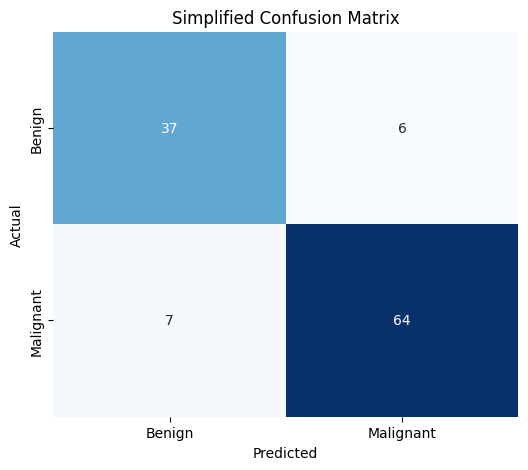

In [12]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Benign', 'Malignant']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Simplified Confusion Matrix')
plt.show()

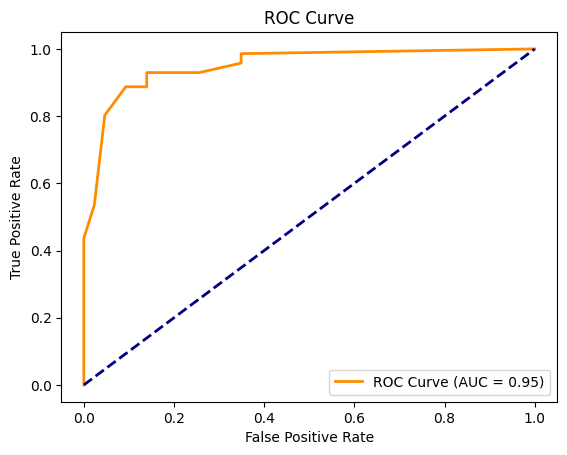

In [13]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()